In [17]:
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50
from PIL import Image
import torchvision.transforms as transforms
import torch
import matplotlib.pyplot as plt
import numpy as np

In [18]:
model = resnet50(pretrained=True)
target_layers = [model.layer4[-1]]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [19]:
# Open the image using PIL
image = Image.open("/Users/nursulusagimbayeva/Downloads/TrustworthyML-24/neural_networks_explainability/LIME/data/n01443537_goldfish.JPEG")

#converting the image to tensor
transform = transforms.ToTensor()

# Apply the transform to the image
input_tensor = transform(image)
input_tensor = input_tensor.unsqueeze(0)

In [20]:
input_tensor.shape

torch.Size([1, 3, 263, 376])

In [21]:
# Convert the original image to numpy array and normalize it to [0, 1]
rgb_img = np.array(image) / 255.0  # Normalize to [0, 1]
rgb_img = rgb_img.astype(np.float32) 

In [22]:
# The Ablation CAM object can be replaced by AblationCAM or ScoreCAM
cam = GradCAM(model=model, target_layers=target_layers)

targets = [ClassifierOutputTarget(1)]

grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# Put one image in the batch. TODO: adapt for several 
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

model_outputs = cam.outputs

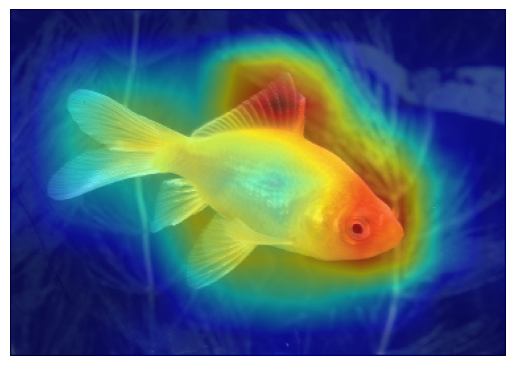

In [23]:
plt.imshow(visualization)
plt.axis('off')  
plt.show()